## RT prediction using AutoRT

In this notebook, I will walk you through an example about RT prediction using one of AutoRT pretrained models. We will run the prediction using Google Colab so you don't need to install anything on your local computer.

#### Run AutoRT on Google Colab

Only run the following code when run this notebook on Google Colab. Colab already has all the dependent libraries and packages installed, so we only need to download AutoRT from github.

In [1]:
## install AutoRT
! git clone https://github.com/bzhanglab/AutoRT
! ls -l -t
%cd /content/

Cloning into 'AutoRT'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 562 (delta 80), reused 48 (delta 20), pack-reused 428
Receiving objects: 100% (562/562), 1.33 GiB | 15.73 MiB/s, done.
Resolving deltas: 100% (268/268), done.
Updating files: 100% (93/93), done.
total 8
drwxr-xr-x 6 root root 4096 Mar  2 02:18 AutoRT
drwxr-xr-x 1 root root 4096 Feb 28 14:27 sample_data
/content


### Example dataset

In this example, we will use a dataset used in the original AutoRT paper. It is from a label free dataset and all the peptides are from a single fraction. For MS/MS searching, a fixed modification of Carbamidomethyl (C) and a variable modifications of Oxidation (M) were used. Since all C amino acids were modified, we don't need to encode modified C in AutoRT. For amino acid M, there should have two versions in the dataset, so we need to encode modified M and unmodified M. We use "M" to represent unmodified M and use "1" to represent modified M (Oxidation [M]).This should be consistent with the encoding for modifications in the training data used for base models.

The example data is in the folder **AutoRT/example/**: data/28CPTAC_COprospective_W_VU_20150810_05CO037_f01_normal_test.tsv

Go to the folder **AutoRT/example/**:

In [2]:
## go to the folder example
%cd AutoRT/example/

/content/AutoRT/example


Check all the data in the foler **AutoRT/example/**:

In [3]:
! ls -l

total 1396
drwxr-xr-x 4 root root   4096 Mar  2 02:18 data
-rw-r--r-- 1 root root 292772 Mar  2 02:18 Experiment_specific_RT_prediction_using_AutoRT.ipynb
-rw-r--r-- 1 root root 578256 Mar  2 02:18 Experiment_specific_RT_prediction_using_AutoRT_MaxQuant_Ecoli.ipynb
-rw-r--r-- 1 root root 532275 Mar  2 02:18 Phosphorylation_experiment_specific_RT_prediction_using_AutoRT_Colab.ipynb
-rw-r--r-- 1 root root      1 Mar  2 02:18 README.md
drwxr-xr-x 2 root root   4096 Mar  2 02:18 scripts
-rw-r--r-- 1 root root    373 Mar  2 02:18 train_model_from_scratch.sh
-rw-r--r-- 1 root root    359 Mar  2 02:18 transfer_learning.sh


In [4]:
import pandas as pd
train_data = pd.read_csv("data/28CPTAC_COprospective_W_VU_20150810_05CO037_f01_normal_test.tsv",sep="\t")
print("The number of unique peptides in the training data: %d" % (train_data.shape[0]))
train_data.head()

The number of unique peptides in the training data: 572


,x,y
0,LINNNPEIFGPLK,46.334335
1,VGDTYERPK,11.445240
2,TSRPENAIIYNNNEDFQVGQAK,33.492008
3,KQNVVPTVLALGSDVD1DVLTTLSLGDR,83.955305
4,IVASTLSNPELFEEWTGNVK,64.316923


### Prediction

The column **x** is required which contains the peptides. The column "y" is not required.

RT distribution in the test data is shown below. The unit of the RT in the data is minute.

<ipython-input-5-34b164c347b3>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


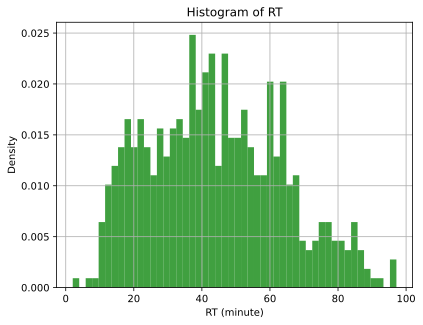

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# the histogram of the data
plt.hist(train_data['y'], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('RT (minute)')
plt.ylabel('Density')
plt.title('Histogram of RT')
plt.grid(True)
plt.show()


Run RT prediction using the pretrained model available at ../models/general_base_model/. To predict RTs for user-provided peptides, users could upload a peptide list file to Google Colab using the file uploading function as shown below:

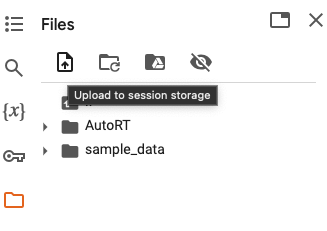

After the user-provided peptide file is uploaded, copy the path of the file and then replace the the file to -t in "-t data/28CPTAC_COprospective_W_VU_20150810_05CO037_f01_normal_test.tsv" from the following command line. Please note if the format of the input file is not directly supported by AutoRT, the user should format it based on the example data as shown above.

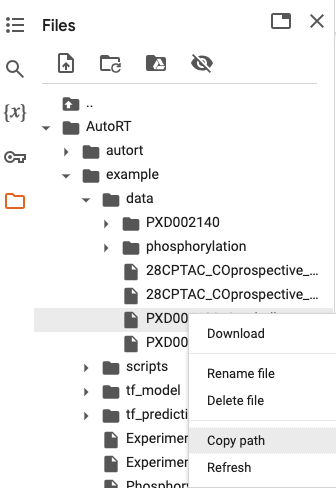

Run the following command line to run the RT prediction:

In [9]:
! python ../autort.py predict -t data/28CPTAC_COprospective_W_VU_20150810_05CO037_f01_normal_test.tsv -s ../models/general_base_model/model.json -o tf_prediction/ -p test

2024-03-02 03:09:42.110370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 03:09:42.110416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 03:09:42.111866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 03:09:42.122673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 03:09:43.538245: W tensorflow/comp

The prediction result is in the file **tf_prediction/test.tsv**. The values in the column **y_pred** are predicted RT. Other files in the same folder are intermediate files which are not useful to users.

To check the distribution of predicted RT, run the following code:

total 164
-rw-r--r-- 1 root root 16818 Mar  2 03:09 test_0.csv
-rw-r--r-- 1 root root  2416 Mar  2 03:09 test_0.npy
-rw-r--r-- 1 root root 16822 Mar  2 03:09 test_1.csv
-rw-r--r-- 1 root root  2416 Mar  2 03:09 test_1.npy
-rw-r--r-- 1 root root 16833 Mar  2 03:10 test_2.csv
-rw-r--r-- 1 root root  2416 Mar  2 03:09 test_2.npy
-rw-r--r-- 1 root root 16837 Mar  2 03:10 test_5.csv
-rw-r--r-- 1 root root  2416 Mar  2 03:10 test_5.npy
-rw-r--r-- 1 root root 16821 Mar  2 03:10 test_7.csv
-rw-r--r-- 1 root root  2416 Mar  2 03:10 test_7.npy
-rw-r--r-- 1 root root 16633 Mar  2 03:10 test_evaluate.csv
-rw-r--r-- 1 root root 23179 Mar  2 03:10 test.tsv


<ipython-input-10-d8fc520d1519>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


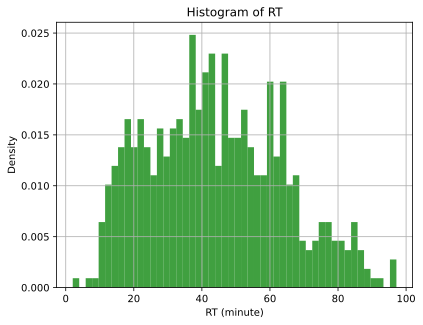

In [10]:
! ls -l tf_prediction/
a = pd.read_csv("tf_prediction/test.tsv",sep="\t")

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# the histogram of the data
plt.hist(a['y'], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('RT (minute)')
plt.ylabel('Density')
plt.title('Histogram of RT')
plt.grid(True)
plt.show()